# **TikTok Project**
**Data provided as part of the Google Advanced Data Analytics Certification (Offered Through Coursera)**

**Scenario**:  TikTok users have the ability to submit reports that identify videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. The process generates a large number of user reports that are challenging to consider in a timely manner. The goal of this project is to develop a predictive model that can determine whether a video contains a claim or offers an opinion. Successful implementation of a predictive model will allow TikTok to reduce the backlog of user reports and prioritze them more efficiently. Required deliverables include:
> - Inspection of the dataset before analysis begins
> - Determination of what the TikTok data provides by using exploratory data analysis (EDA)
> - Development of a machine learning model
>> - Testing of the model to assure the model is delivering consistent results
> - Determine whether or not the model meets project requirements

### Inspection and Understanding of the data

In [1]:
# Import necessary libraries and packages:

import pandas as pd
import numpy as np

In [2]:
# Load the dataset into a dataframe:

df = pd.read_csv('tiktok_dataset.csv')

In [3]:
# Display the first few lines of the dataframe to understand the organization:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In order to better understand what the column names mean, clarification was obtained from the data owner:<br>
**#**: TikTok assigned number for video with claim/opinion<br>
**claim_status**: Whether the published video has been identified as an "opinion" or a "claim."<br>
> 1. Opinion = An individual's or group's personal belief or thought
> 2. Claim = Information that is either unsourced or from an unverified source

**video_id**: Random identifying number assigned to video upon publication on TikTok<br>
**video_duration_sec**: Length of the published video, in seconds<br>
**video_transcript_text**: Transcribed text of the words spoken in the published video<br>
**verified_status**: Indicates the status of the TikTok user who published the video in terms of their verification, either "verified" or "not verified"<br>
**author_ban_status**: Indicates the status of the TikTok user who published the video in terms of their permissions: "active," "under scrutiny," or "banned"<br>
**video_view_count**: The total number of times the published video has been viewed<br>
**video_like_count**: The total number of times the published video has been liked by other viewers<br>
**video_share_count**: The total number of times the published video has been shared by other users<br>
**video_download_count**: The total number of times the published video has been downloaded by other users<br>
**video_comment_count**: The total number of comments on the published video<br>

In [4]:
# Determine data types and check for any missing entries:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Observations:<br>
1. The dataframe contains categorical, text and numerical data with each row representing a distinct TikTok video presenting either a claim or an opinion (and other metadata).
2. There are 19,382 variables and some are missing data, including claim_status, video_transcription_text and the five columns containing various counts.

In [5]:
# Obtain summary statistics about the dataframe:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Due to the nature of this data, it's a little hard to glean much from the descriptive statistics. However at first glance, the count columns appear to have left skewed distributions with max values very high compared to the quartile values.


### Variable Investigation
The ultimate objective of the project is to develop a machine learning model that classifies videos as claims or opinions. Examining the **claim_status** variable is a good first step.

In [6]:
# First, determine the number of claim and opinion videos
df['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

The results above show the number of claim and opinion videos is nearly equal.

In [7]:
# Next, examine the engagement trends associated with each different claim status:
# for "claims"
claims = df[df['claim_status'] == 'claim']
avg_claim = round(claims['video_view_count'].mean(), 2)
median_claim = round(claims['video_view_count'].median(), 2)

# for "opinions"
opinions = df[df['claim_status'] == 'opinion']
avg_opinion = round(opinions['video_view_count'].mean(), 2)
median_opinion = round(opinions['video_view_count'].median(), 2)

# Print the results
print('Average view count for claims: ', avg_claim)
print('Median view count for claims: ', median_claim)
print('Average view count for opinions: ', avg_opinion)
print('Median view count for opinions: ', median_opinion)

Average view count for claims:  501029.45
Median view count for claims:  501555.0
Average view count for opinions:  4956.43
Median view count for opinions:  4953.0


The average and median view count within each category is nearly the same, however there is a huge discrepancy between claims and opinions.

In [8]:
# Examine trends associated with author_ban_status
# Determine the number of videos for each combination of claim_status and author_ban_status
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]


#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

There nearly 10x more claim videos with banned users than opinion videos with banned authors. This could be due to claim videos facing stricter scrutiny and authors having to adhere to stricter guidelines when sharing claim videos rather than opinions. 

In [9]:
# Next, determine the median video share count of each author ban status
df.groupby(['author_ban_status']).median()[['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


Banned authors have a significantly higher median video share count than active authors. This should be explored more in depth

In [10]:
# Determine the count, mean and median of each count column, grouped by author ban status
# limit the number of decimal places for clarity
rounded = df.groupby(['author_ban_status']).agg({'video_view_count': ['count', 'mean', 'median'],
                                       'video_like_count': ['count', 'mean', 'median'],
                                       'video_share_count': ['count', 'mean', 'median']})
rounded = rounded.round(0)
rounded

video_view_count                     video_like_count  \
                             count      mean    median            count   
author_ban_status                                                         
active                       15383  215927.0    8616.0            15383   
banned                        1635  445845.0  448201.0             1635   
under review                  2066  392205.0  365246.0             2066   

                                      video_share_count                    
                       mean    median             count     mean   median  
author_ban_status                                                          
active              71037.0    2222.0             15383  14111.0    437.0  
banned             153017.0  105573.0              1635  29999.0  14468.0  
under review       128718.0   71204.0              2066  25775.0   9444.0

Looking at the results above, it is clear that banned authors (and those under review) get significantly more views, likes and shares than active authors. Additionally, most of the means are much greater than the median, suggesting some videos have very high levels of engagement.

In [11]:
# To better understand these engagement rates, calculate the number of likes
# comments and shares per view. Add these to new columns in the dataframe.
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']
df.head()

# Determine the count, mean and median of these new columns for each combination
# of claim status and author ban status, limiting the number of decimal places for clarity
aggregated = df.groupby(['claim_status', 'author_ban_status']).agg(
   {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})
aggregated = aggregated.round(4)
aggregated

likes_per_view                  \
                                        count    mean  median   
claim_status author_ban_status                                  
claim        active                      6566  0.3295  0.3265   
             banned                      1439  0.3451  0.3589   
             under review                1603  0.3280  0.3209   
opinion      active                      8817  0.2197  0.2183   
             banned                       196  0.2069  0.1985   
             under review                 463  0.2264  0.2281   

                               comments_per_view                  \
                                           count    mean  median   
claim_status author_ban_status                                     
claim        active                         6566  0.0014  0.0008   
             banned                         1439  0.0014  0.0007   
             under review                   1603  0.0014  0.0008   
opinion      active                         8817  0.0005  0.0003   
             banned                          196  0.0004  0.0002   
             under review                    463  0.0005  0.0003   

                               shares_per_view                  
                                         count    mean  median  
claim_status author_ban_status                                  
claim        active                       6566  0.0655  0.0493  
             banned                       1439  0.0679  0.0516  
             under review                 1603  0.0657  0.0500  
opinion      active                       8817  0.0437  0.0324  
             banned                        196  0.0405  0.0307  
             under review                  463  0.0445  0.0350


It's observed that videos from banned authors and those under review often garner more views, likes, and shares compared to videos from non-banned authors. Interestingly, when a video gets viewed, its engagement seems less tied to author ban status but more to its claim status.

In terms of viewership, claim videos show a higher view rate than opinion videos, implying a greater average liking for claim videos. Additionally, they attract more engagement through comments and shares than opinion videos.

For claim videos, banned authors exhibit slightly higher rates of likes/view and shares/view compared to active authors or those under review. Conversely, for opinion videos, active authors and those under review achieve higher engagement rates across all categories than banned authors.

### Exploratory Data Analysis (EDA)

The goal of this section is to perform futher data exploration and cleaning as well as build visualizations to better understand the data. Continuing the scenario, the TikTok team/stakeholders requested a graph comparing claim counts to opinion counts, boxplots of the most important variables (video duration, video like count, video comment count and video view count) to check for outliers, as well as a breakdown of author ban status counts.

In [12]:
# Load visualization libraries seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Boxplots and histograms for will first be built for the requested important variables.

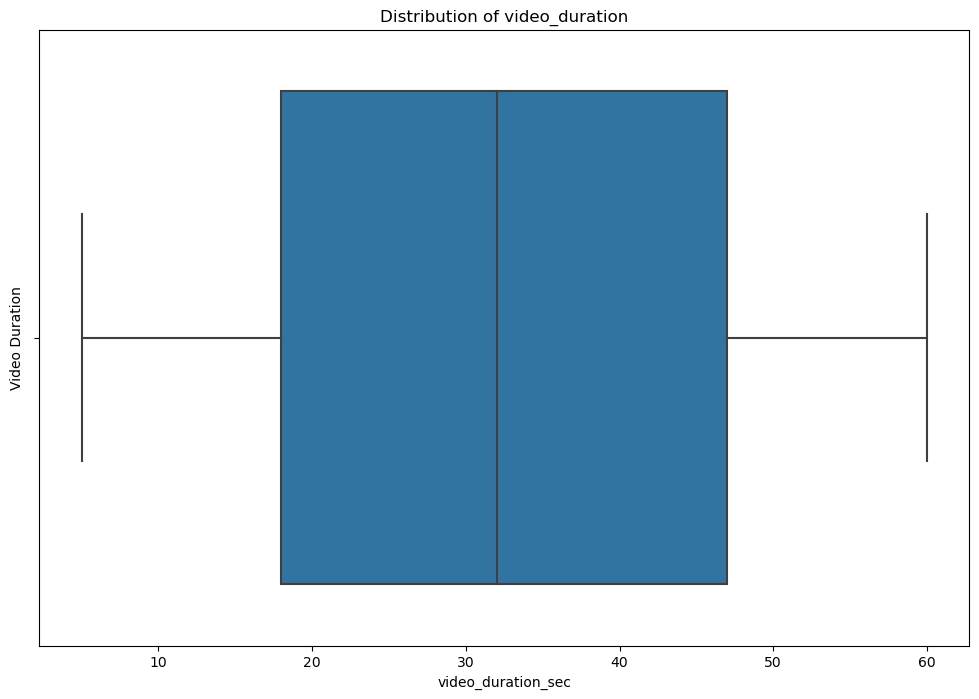

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize = (12,8))
sns.boxplot(x = 'video_duration_sec',
           data = df)
plt.title('Distribution of video_duration')
plt.ylabel('Video Duration')
plt.show()

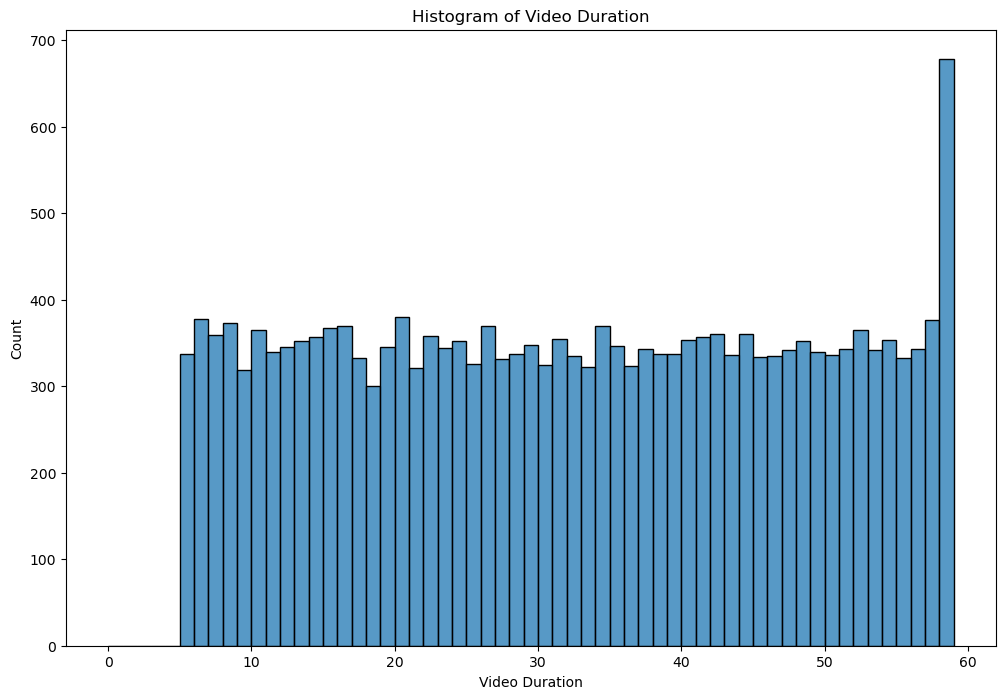

In [14]:
# Create a histogram of video_duration_sec
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'video_duration_sec',
             bins = range(0,60,1))
plt.xlabel('Video Duration')
plt.title('Histogram of Video Duration')
plt.show()

The histogram above shows that all videos in the dataset are between 5 and 60 seconds long and, with the exception of 60 second videos, shows a uniform distribution.

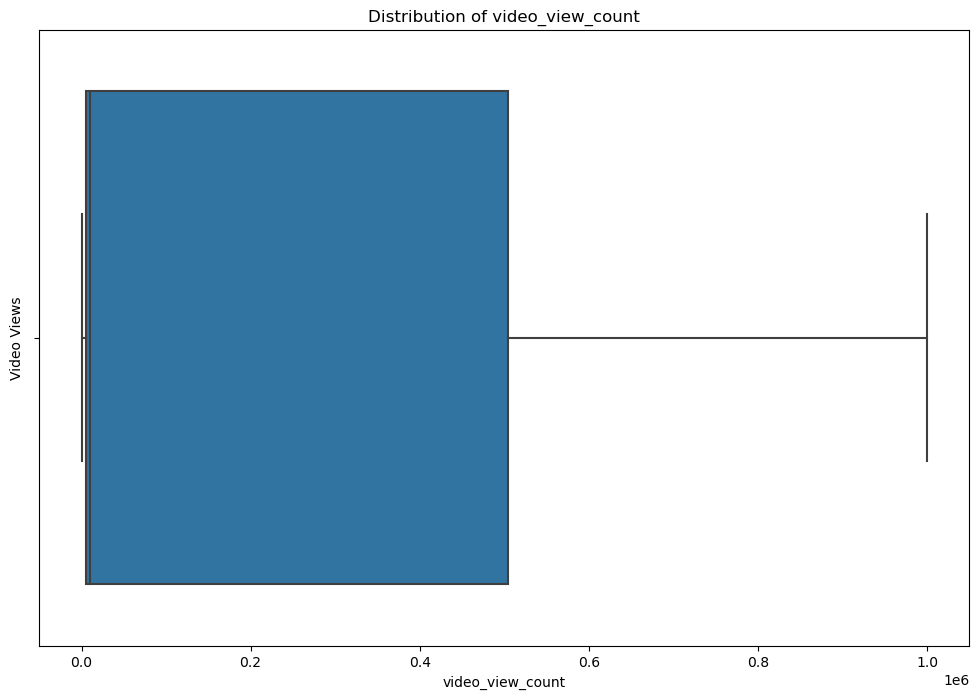

In [15]:
# Create a boxplot of video_view_count
plt.figure(figsize = (12,8))
sns.boxplot(x = 'video_view_count',
           data = df)
plt.title('Distribution of video_view_count')
plt.ylabel('Video Views')
plt.show()

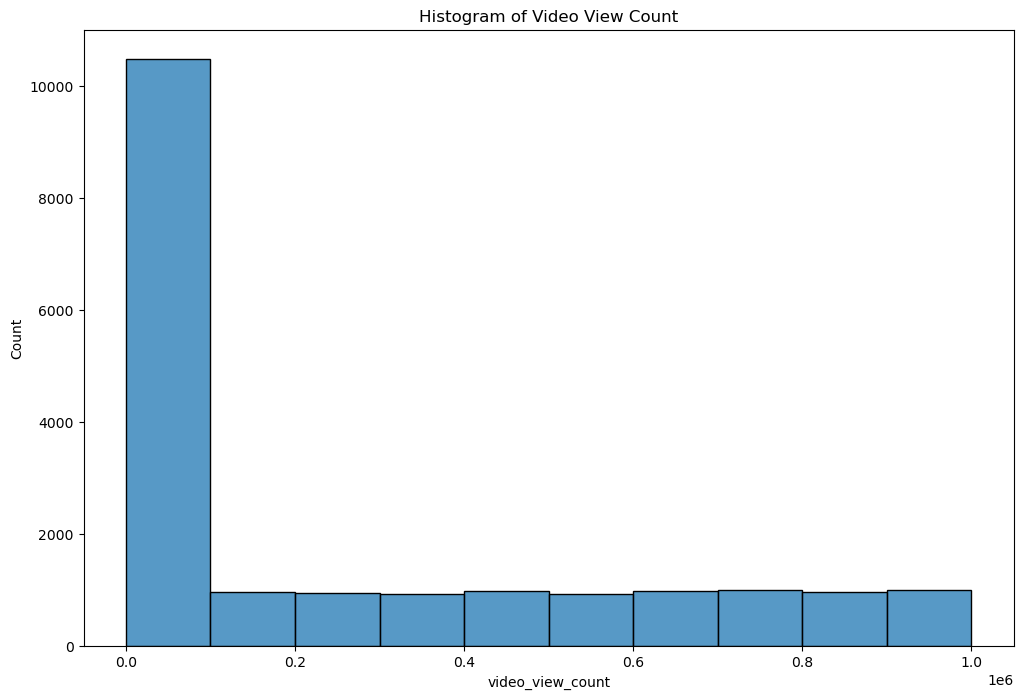

In [16]:
# Create a histogram of video_view_count
plt.figure(figsize = (12,8))
sns.histplot(df['video_view_count'],
                bins = range(0,(10**6+1),(10**5)))
plt.title('Histogram of Video View Count')
plt.show()

Video view count has a very uneven distribution, with what appears to be more than half the videos receving less than 100,000 views. Above 100,000 views, the view count distribution is quite uniform.

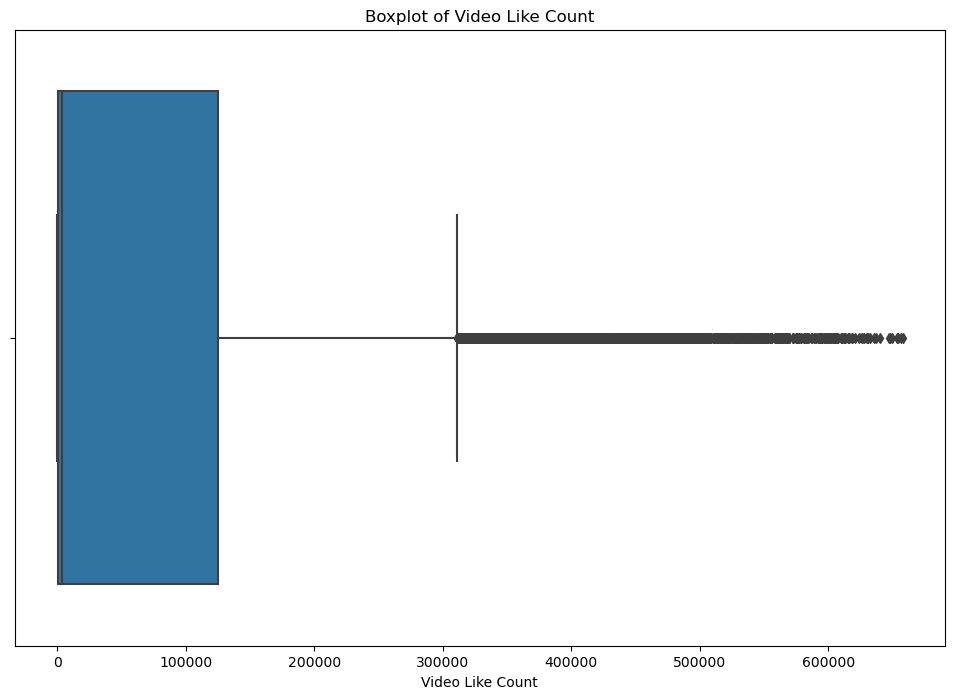

In [17]:
# Create a boxplot of video_like_count
plt.figure(figsize = (12,8))
sns.boxplot(data = df,
            x = 'video_like_count')
plt.title('Boxplot of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()

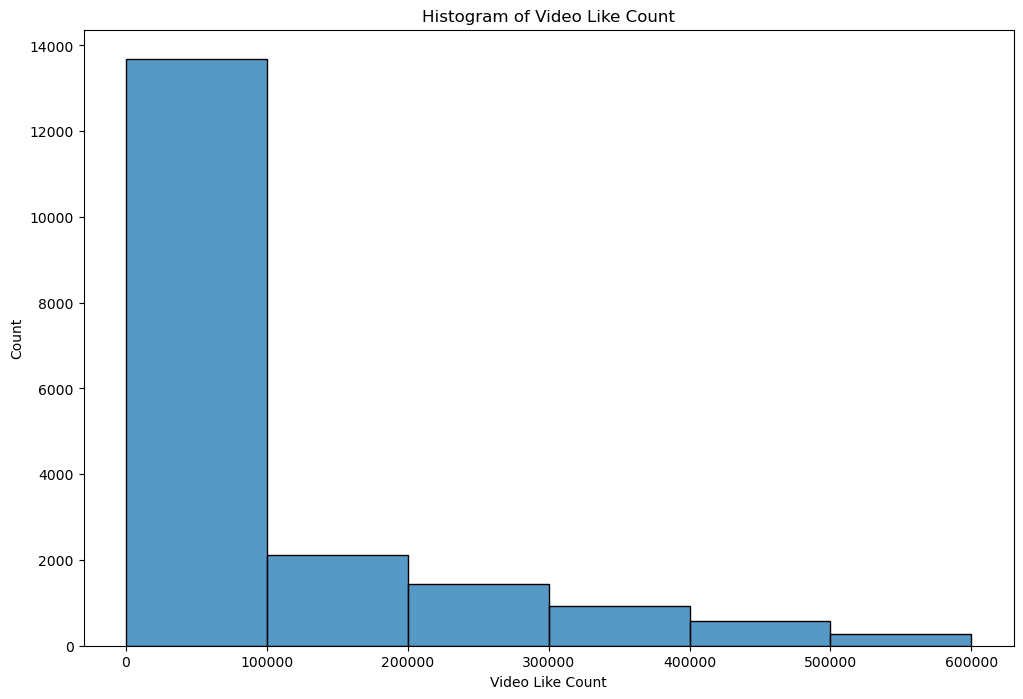

In [18]:
# Create a histogram of video_like_count
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'video_like_count',
             bins = range(0,700000,100000))
plt.xlabel('Video Like Count')
plt.title('Histogram of Video Like Count')
plt.show()

The histogram for video_like_count shows a similar trend to video_view_count, in that there are significantly more videos with less than 100,000 likes than videos with >100,000 likes. For video_like_count however, there is a right skew with a tapering off of the number of video videos receiving high like counts.

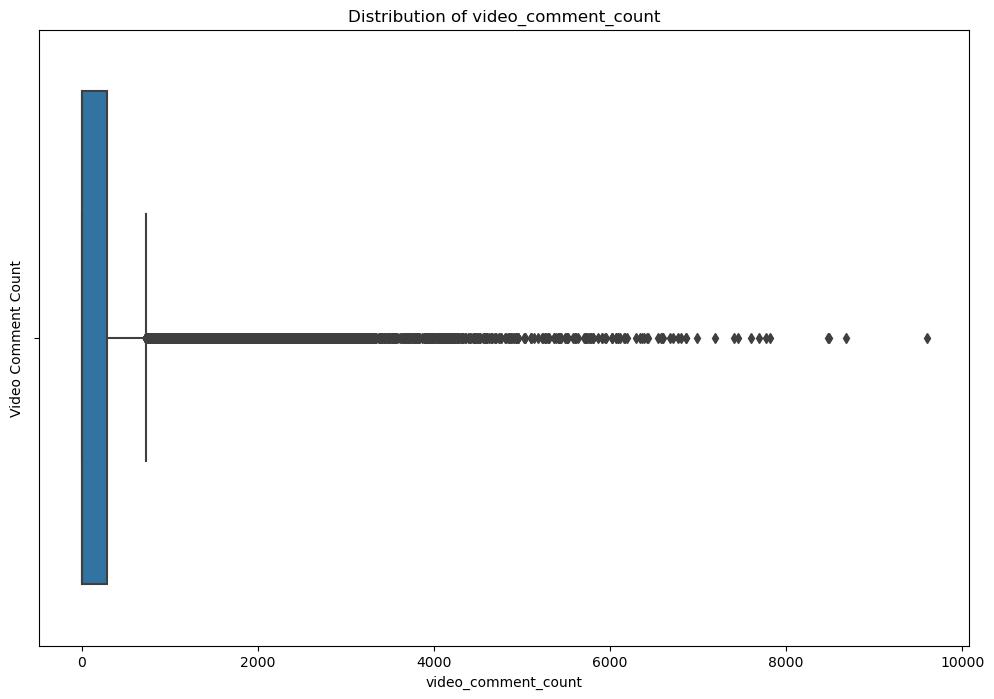

In [19]:
# Create a boxplot of video_comment_count
plt.figure(figsize = (12,8))
sns.boxplot(x = 'video_comment_count',
           data = df)
plt.title('Distribution of video_comment_count')
plt.ylabel('Video Comment Count')
plt.show()

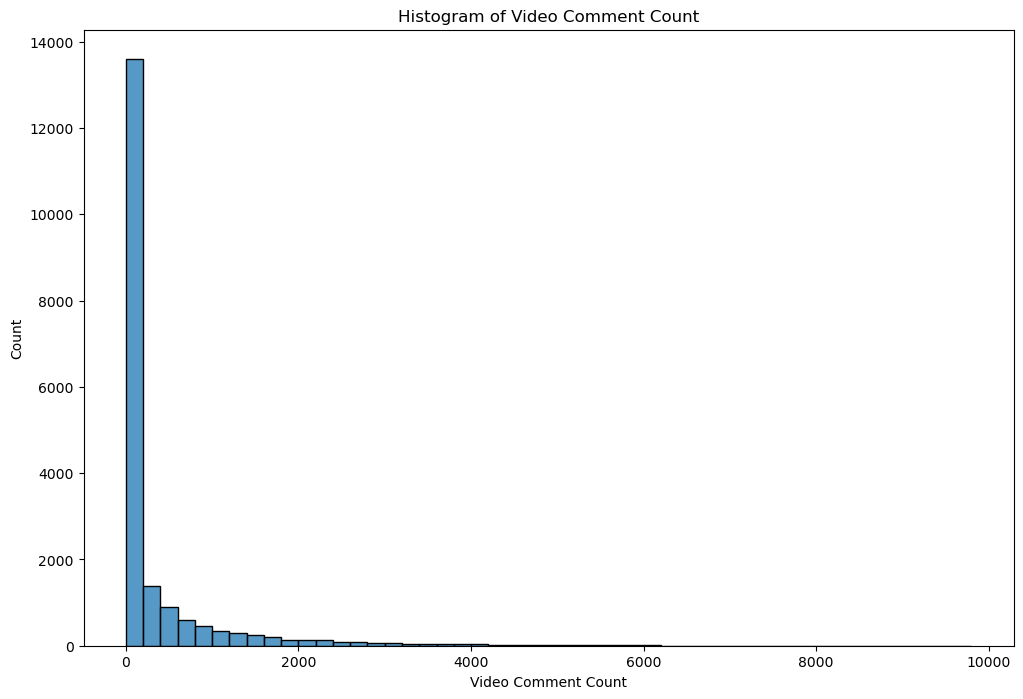

In [20]:
# Create a histogram of video_comment_count:
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'video_comment_count',
             bins = range(0,10000,200))
plt.xlabel('Video Comment Count')
plt.title('Histogram of Video Comment Count')
plt.show()

Similar to video view and like counts, the video comment count distribution is right skewed, with the majority grouped at the bottom of the comment count range. The data show that msot videos have 100 or less comments.

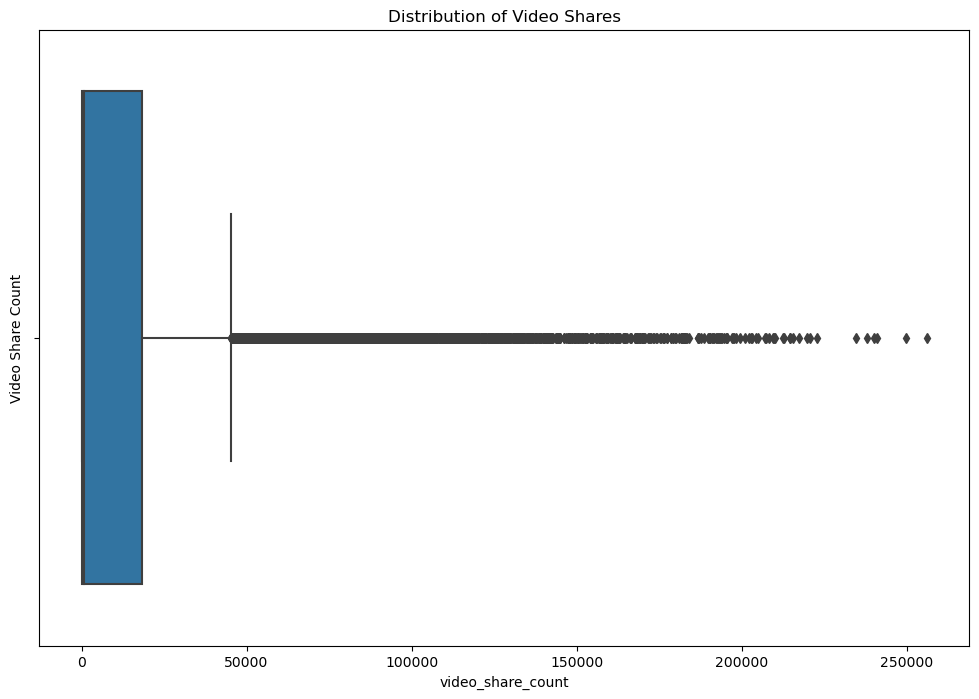

In [21]:
# Create a boxplot for video_share_count
plt.figure(figsize = (12,8))
sns.boxplot(x = 'video_share_count',
           data = df)
plt.title('Distribution of Video Shares')
plt.ylabel('Video Share Count')
plt.show()

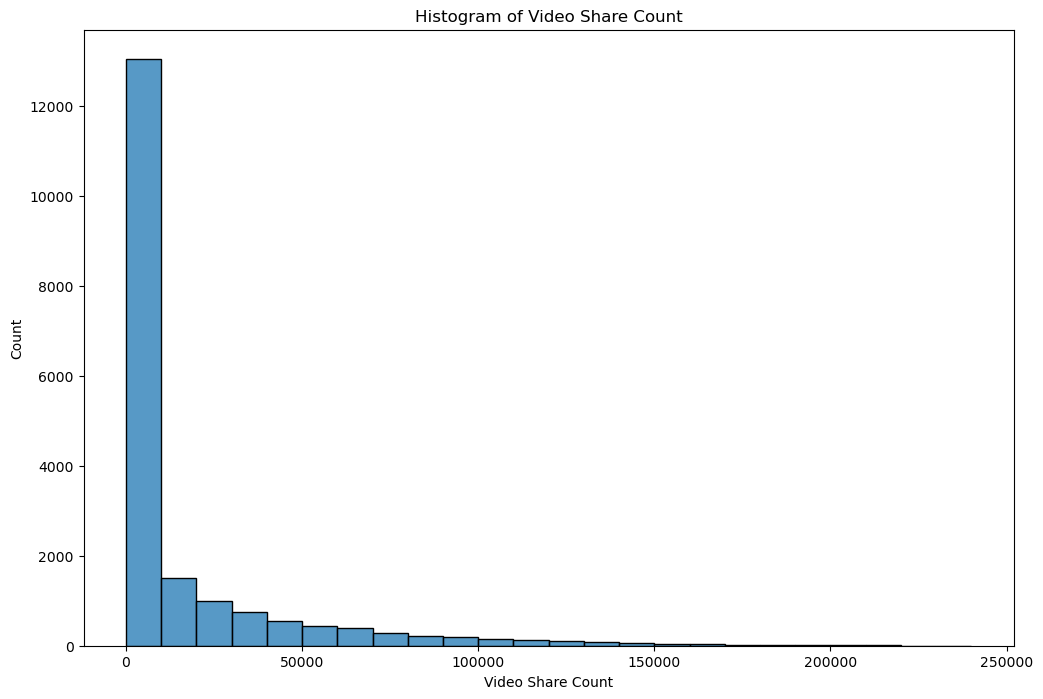

In [22]:
# Create a histogram for video_share_count
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'video_share_count',
             bins = range(0,250000,10000))
plt.xlabel('Video Share Count')
plt.title('Histogram of Video Share Count')
plt.show()

The boxplot and histogram of video share count show the majority of videos had 10,000 of less views. Additionally, the histogram shows the distribution of video share count to be very right skewed

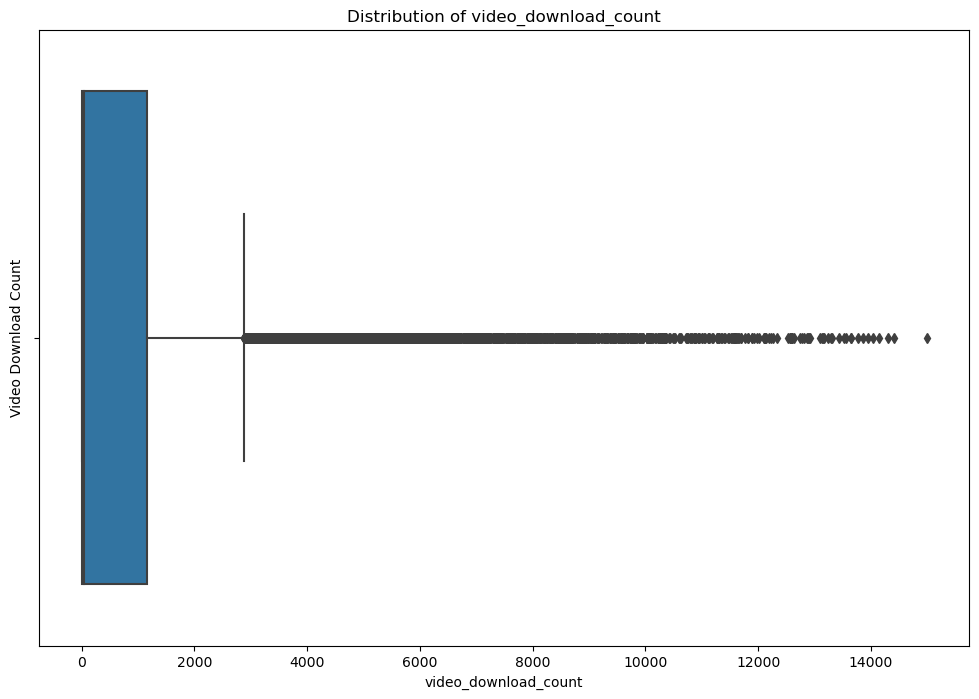

In [23]:
# Create boxplot to show the distribution of video_download_count
plt.figure(figsize = (12,8))
sns.boxplot(x = 'video_download_count',
           data = df)
plt.title('Distribution of video_download_count')
plt.ylabel('Video Download Count')
plt.show()

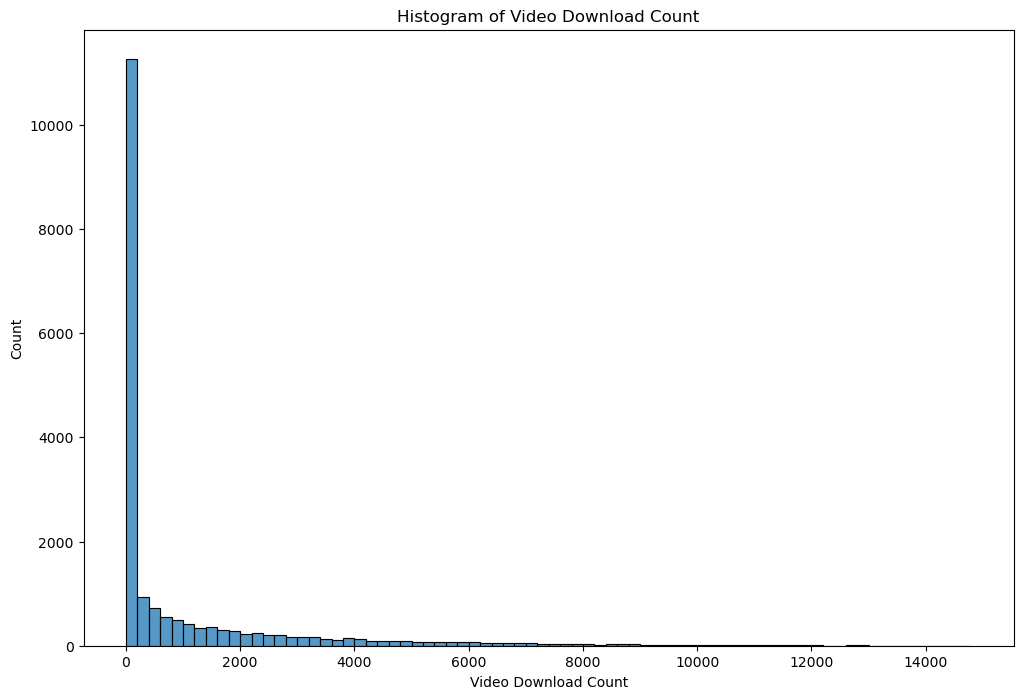

In [24]:
# Create a histogram for video_download_count
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'video_download_count',
             bins = range(0,15000,200))
plt.xlabel('Video Download Count')
plt.title('Histogram of Video Download Count')
plt.show()

Video download count data show the majority of videos were downloaded fewer than 200 times, though some were downloaded over 12,000 times. Data are significantly right-skewed.

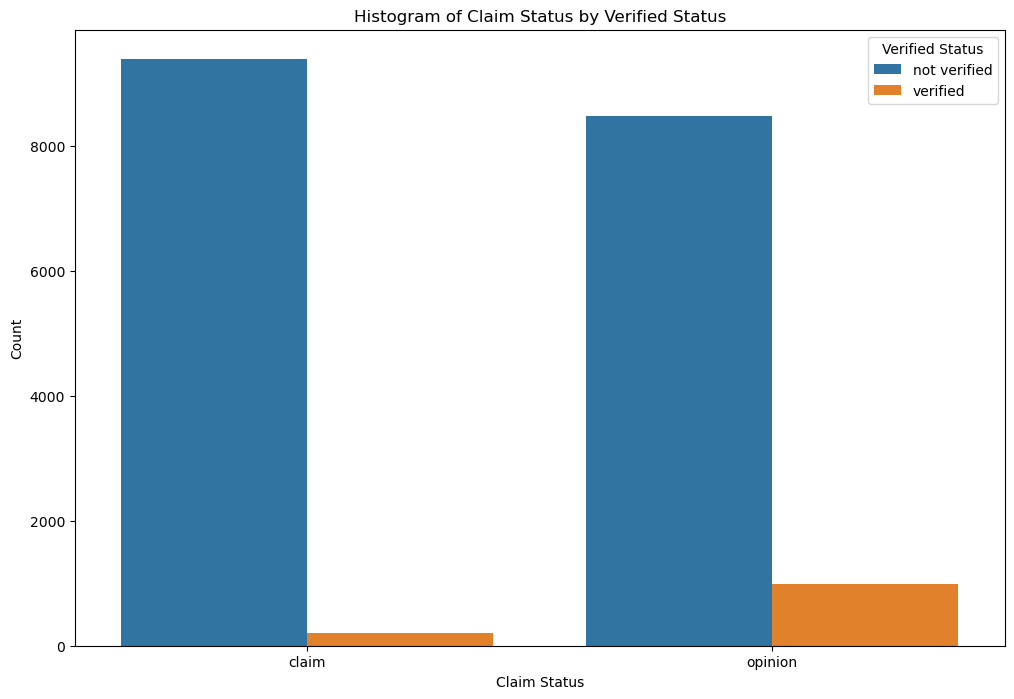

In [25]:
# Investigate claim status by verification status by creating a histogram with
# one bar for each combination of claim and verification status
plt.figure(figsize = (12,8))
sns.countplot(x = 'claim_status',
             hue = 'verified_status',
             data = df)
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.title('Histogram of Claim Status by Verified Status')
plt.legend(title = 'Verified Status')
plt.show()

The histogarm above shows that there are far fewer verified than non-verified user, and if a user is verified they are more likely to post opinions than claims.

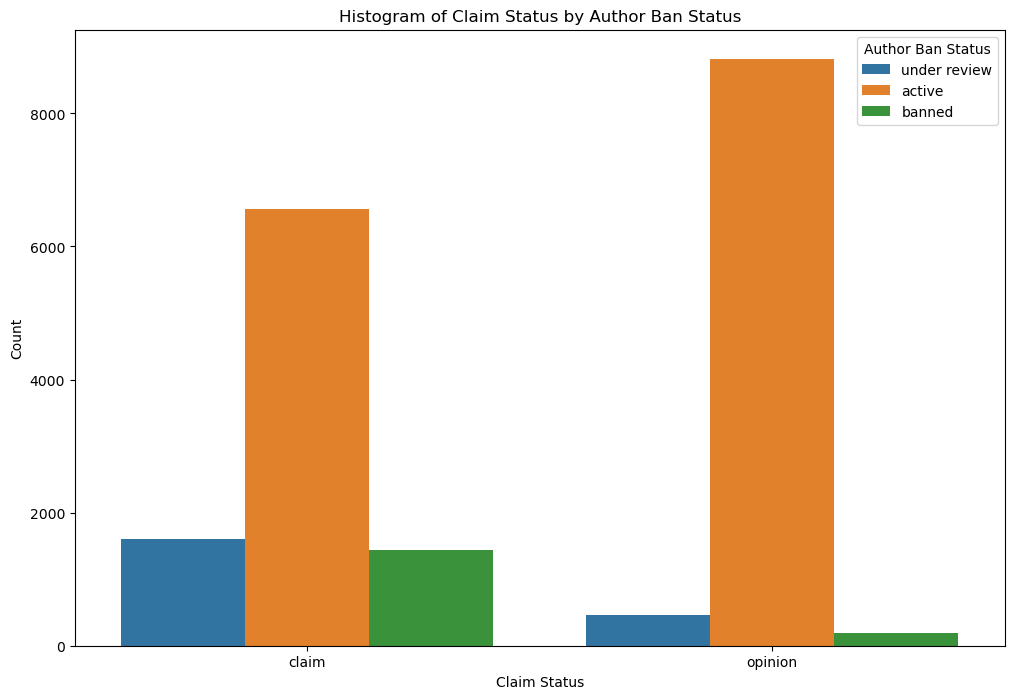

In [26]:
# Investigate claim status by author ban status by creating a histogram with
# one bar for each combination of claim and ban status
plt.figure(figsize = (12,8))
sns.countplot(x = 'claim_status',
             hue = 'author_ban_status',
             data = df)
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.title('Histogram of Claim Status by Author Ban Status')
plt.legend(title = 'Author Ban Status')
plt.show()

The histogram above shows that for both claims and opinions there are significantly more active authors than banned or under review authors. Additionally, the proportion of active authors is greater for opinion videos than claims, suggesting that authors posting claim videos are more likely to be reviewed and/or banned.

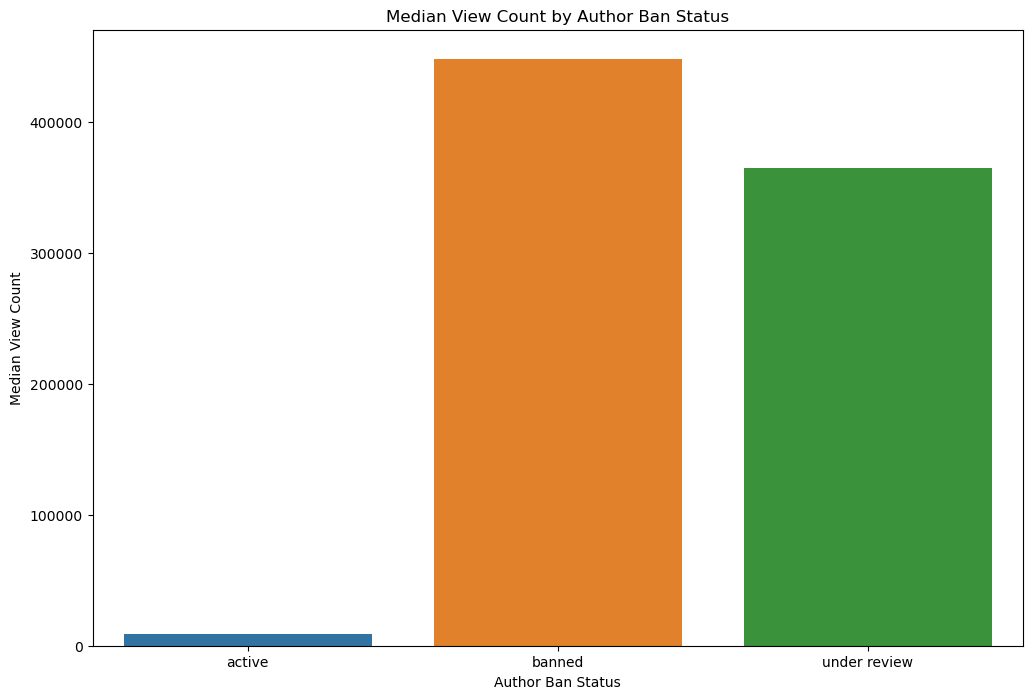

In [27]:
# Investigate view counts by ban status, creating a bar plot with one bar for
# each author ban status, and the heights corresponding to the median number of
# views for all videos with a particular ban status.
median_view = df.groupby('author_ban_status')['video_view_count'].median().reset_index()

plt.figure(figsize = (12,8))
sns.barplot(x = 'author_ban_status',
           y = 'video_view_count',
           data = median_view)
plt.xlabel('Author Ban Status')
plt.ylabel('Median View Count')
plt.title('Median View Count by Author Ban Status')
plt.show()

Median view counts for banned and under review authors are far greater than for active authors. From previous data it has been established that banned and under review authors are more likely to post claims, and videos by banned and undeer review authors are viewed more than those by active authors. Therefore, the **video_view_count** variable may be useful as an indicator of claim status. This can be confirmed by looking at the median count of video views by claim status:

In [28]:
# Determine the median video view count grouped by claim status:
df.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

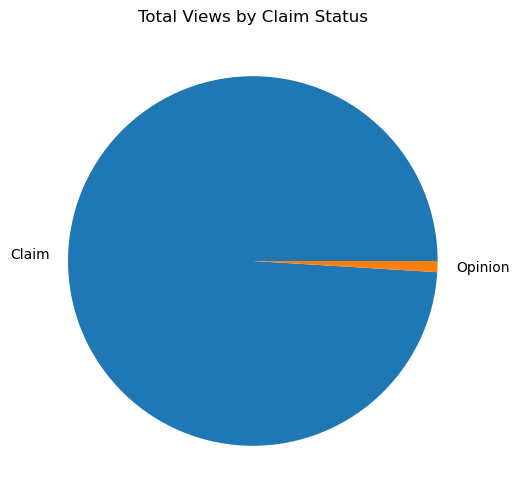

In [29]:
# Visualize the proportion of total views for claim videos vs opinion videos:
plt.figure(figsize = (6, 6))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), 
       labels = ['Claim', 'Opinion'])
plt.title('Total Views by Claim Status')
plt.show()

It is obviously clear from the pie chart above that claims are viewed significantly more than opinions even though the number of videos for each (in this dataset) are nearly the same.

### Determining Outliers

When we create models to predict outcomes, having outliers in our data can cause issues. For instance, when trying to predict video views, videos with incredibly high counts might make our predictions biased. Some outliers might even show problems with how we gathered the data.

The main goal of the TikTok project is predicting if a video is a claim or an opinion. The initial analysis shows a strong link between a video's engagement and whether it's a claim or opinion. The data points in TikTok aren't wrong-- they fit given how social media usually works, but only a few videos get sigificant attention because they go viral.

It's good practice to see how many outliers the data may contain, and what is considered an outlier can change based on the project. It's helpful to know the subject well to set these limits. A common way to spot outliers in a normal distribution is by calculating the interquartile range (IQR) and setting a threshold at 1.5 times IQR above the 3rd quartile.

In the TikTok dataset, the counts aren't distributed normally and show significant right-skewness. The outlier threshold can be adjusted by finding the median value for each count and then adding 1.5 times IQR. This gives a lower threshold than using the 3rd quartile, especially in this case.

To determine the number of outliers for each count column, a **for** loop can be written that iterates over the column names of each count variable. For each iteration:
> 1. Calculate the IQR of the column
> 2. Calculate the median of the column
> 3. Calculate the outlier threshold (median + 1.5 * IQR)
> 4. Calculate the number of videos with a count in that column that exceeds the outlier threshold
> 5. Print the results

In [30]:
# First, create a list containing the names of the count columns:
count_columns = ['video_view_count', 'video_like_count', 'video_share_count',
                'video_download_count', 'video_comment_count']

# write the for loop
for column in count_columns:
    # calculate IQR
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    # calculate the median
    median = df[column].median()
    # calculate the outlier threshold
    outlier_threshold = median + 1.5 * iqr
    # calculate number of values exceeding outlier threshold
    outlier_count = df[df[column] > outlier_threshold][column].count()
    # print the results
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


**Scatterplot**

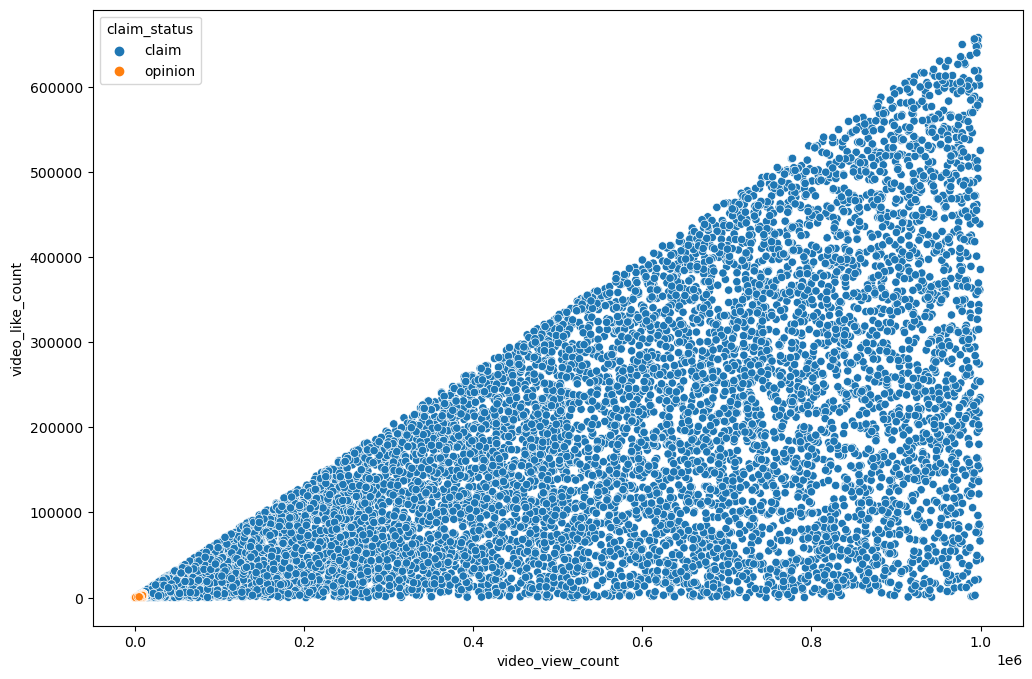

In [31]:
# Create a scatterplot of video_view_counts vs. video_like_count according to 
# claim status:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'video_view_count',
                y = 'video_like_count',
                hue = 'claim_status',
                data = df)
plt.show()

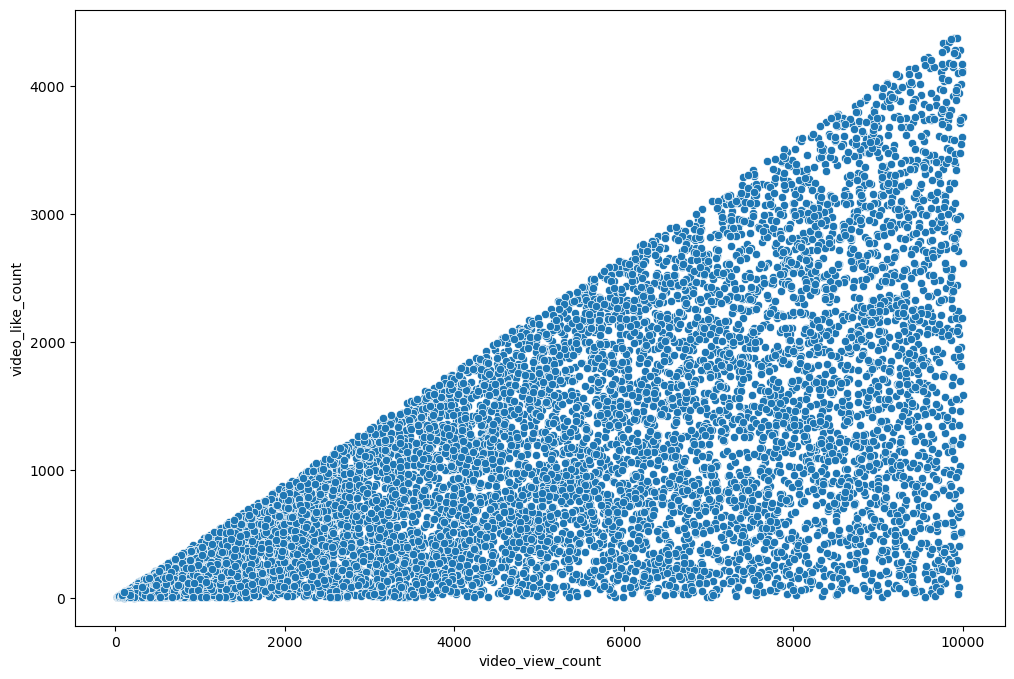

In [32]:
# Create a scatterplot of video_view_count vs video_like_count for opinions only
plt.figure(figsize = (12,8))
opinions = df[df['claim_status'] == 'opinion']
sns.scatterplot(x = 'video_view_count',
                y = 'video_like_count',
                data = opinions)
plt.show()

## Statistical Analysis

**Scenario:** After performing EDA and creating visualizations, the next step is to use statistical methods to analyze and interpret the claims classification data. The goal is to determine whether there is a statistically significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts. This will be done by conducting a hypothesis test on verified versus unverified accounts in terms of video view count.

In [33]:
# Import packages for statistical analysis/hypothesis testing
from scipy import stats

In [34]:
# View information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  likes_per_view            19084 non-null  float64
 13  comments_per_view         19084 non-null  float64
 14  shares

As determined earlier in this notebook the TikTok data file is missing some values which can be dropped

In [36]:
# Drop rows with any missing values
df = df.dropna()

To determine the relationship between verified_status and video_view_count, a reasonable first step is to examine the mean video view count for each verified status.

In [37]:
# Determine the mean video view count for each group in verified status
mean_count_by_status = df.groupby('verified_status')['video_view_count'].mean()
mean_count_by_status

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

The results show the mean video view count for non-verified users is nearly 3x higher than for verified users.

For hypothesis testing, the null and alternative hypotheses need stated:
> Null Hypothesis $H_0$: There is no difference in the number of views between TikTok videos posted by verified accounts and those posted by unverified accounts (and any observed difference in the sample data is due to chance or sampling variability).<br>

> Alternative Hypothesis $H_A$: There is a difference in the number of views between TikTok videos posted by verified accounts and those posted by unverified accounts (and any observed difference in the sample data is due to an actual difference in the corresponding population means)

Using a 5% significance level, a two-sample t-test can be performed to test for statistical significance.

In [38]:
# Isolate the video view counts for verified and not verified users
verified_counts = df[df['verified_status'] == 'verified']['video_view_count']
unverified_counts = df[df['verified_status'] == 'not verified']['video_view_count']

# Perform the two-sample t-test
stats.ttest_ind(verified_counts, unverified_counts, equal_var = False)

Ttest_indResult(statistic=-25.499441780633777, pvalue=2.6088823687177823e-120)

Given that the p-value is significantly less than the significance level of 0.05, the null hypothesis is rejected meaning there is statistically significant evidence to suggest a difference in the mean video view count between verified and non verified accounts (supporting the alternative hypothesis). 